# Phân loại các văn bản (bình luận trên tweeter) thành 2 lớp 
## 1: mang nghĩa thảm họa 
## 0: không mang nghĩa thảm hoạ

## Chuẩn bị dữ liệu 
### Tải dữ liệu từ link sau: https://www.kaggle.com/c/nlp-getting-started/data

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
root =  "/kaggle/input/nlp-getting-started/"

In [15]:
train_df = pd.read_csv(root + 'train.csv', sep=',', header=0)
test_df = pd.read_csv(root + 'test.csv', sep=',', header=0)
test_df = test_df.fillna('_NA_')

print("Number of training data ", train_df.shape[0])
print("Number of testing data: ", test_df.shape[0])

Number of training data  7613
Number of testing data:  3263


In [22]:
print("Text: ",train_df["text"][0],"\nLabel: ",train_df["target"][0])

Text:  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 
Label:  1


In [30]:
label_names = "target"
y_train = train_df[label_names].values
print(y_train.shape)

(7613,)


In [34]:
#For Pre-Processing
from tqdm import tqdm
import nltk
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize
import os, re, csv, math, codecs

In [47]:
from sklearn.utils import shuffle 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
MAX_NB_WORDS = 100000

raw_docs_train = train_df['text'].tolist()
raw_docs_test = test_df['text'].tolist() 
num_classes = len(label_names)

print("Tiền xử lý dữ liệu...")

processed_docs_train = []
count = 0
for doc in tqdm(raw_docs_train):
    tokens = word_tokenize(doc)
    processed_docs_train.append(" ".join(tokens))
    count = count + 1
    if count < 3:
        print(processed_docs_train)
#     else:
#         break
    
#end for

processed_docs_test = []
count = 0
for doc in tqdm(raw_docs_test):
    tokens = word_tokenize(doc)
    processed_docs_test.append(" ".join(tokens))
    count = count + 1
    if count < 3:
        print(processed_docs_test)
#     else:    
#         break
#end for

print("Trích xuất word tokens...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(processed_docs_train + processed_docs_test)  #leaky
word_seq_train = tokenizer.texts_to_sequences(processed_docs_train)
word_seq_test = tokenizer.texts_to_sequences(processed_docs_test)
word_index = tokenizer.word_index
print("Kích thước từ điển: ", len(word_index))
# #pad sequences
# print(word_seq_train)
# word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
# print(word_seq_train)
# word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

  4%|▍         | 325/7613 [00:00<00:02, 3242.47it/s]

Tiền xử lý dữ liệu...
['Our Deeds are the Reason of this # earthquake May ALLAH Forgive us all']
['Our Deeds are the Reason of this # earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask . Canada']


 20%|██        | 659/3263 [00:00<00:00, 3332.16it/s]

['Just happened a terrible car crash']
['Just happened a terrible car crash', 'Heard about # earthquake is different cities , stay safe everyone .']


100%|██████████| 3263/3263 [00:01<00:00, 3175.31it/s]


Trích xuất word tokens...
Kích thước từ điển:  28729


In [48]:
tokenizer.word_index

{'t': 1,
 'co': 2,
 'http': 3,
 'the': 4,
 'a': 5,
 'to': 6,
 'in': 7,
 'of': 8,
 'i': 9,
 'and': 10,
 'is': 11,
 'you': 12,
 'for': 13,
 'on': 14,
 "'s": 15,
 'it': 16,
 "'": 17,
 'my': 18,
 'that': 19,
 'with': 20,
 'by': 21,
 'at': 22,
 'this': 23,
 "n't": 24,
 'https': 25,
 'are': 26,
 'from': 27,
 'be': 28,
 'was': 29,
 'have': 30,
 'amp': 31,
 'like': 32,
 'as': 33,
 'do': 34,
 'up': 35,
 'just': 36,
 'me': 37,
 'not': 38,
 'but': 39,
 'so': 40,
 'your': 41,
 'out': 42,
 'no': 43,
 'we': 44,
 'will': 45,
 'all': 46,
 'after': 47,
 'fire': 48,
 'has': 49,
 'an': 50,
 "'m": 51,
 'he': 52,
 'if': 53,
 'when': 54,
 'get': 55,
 'new': 56,
 'via': 57,
 'they': 58,
 'more': 59,
 'about': 60,
 '2': 61,
 'now': 62,
 'what': 63,
 'or': 64,
 'news': 65,
 'how': 66,
 'one': 67,
 'people': 68,
 'who': 69,
 'there': 70,
 'over': 71,
 'can': 72,
 'been': 73,
 'into': 74,
 'video': 75,
 'would': 76,
 'emergency': 77,
 'disaster': 78,
 '3': 79,
 'police': 80,
 'her': 81,
 'his': 82,
 'than': 83,


# **Trích xuất word embedding sử dụng pre-trained FastText**

In [61]:
import requests, zipfile, io
zip_file_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [65]:
import codecs
print('loading word embeddings...')

embeddings_index = {}
f = codecs.open('wiki-news-300d-1M.vec', encoding='utf-8')

for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('found %s word vectors' % len(embeddings_index))

1226it [00:00, 6027.37it/s]

loading word embeddings...


999995it [02:53, 5753.29it/s]

found 999995 word vectors


In [68]:
print(embeddings_index.get("he")[:50])
print(embeddings_index.get("he").shape)

[ 0.0468 -0.0502  0.0332 -0.1099 -0.0402 -0.0179 -0.0137 -0.0941  0.0077
  0.0397 -0.0009  0.0304  0.0574 -0.01    0.0081 -0.1169  0.0573 -0.0318
  0.0732 -0.0523  0.0226  0.0025 -0.0294  0.058   0.0753 -0.0718  0.0243
  0.2255  0.0415 -0.0404  0.1806 -0.0763  0.0433 -0.0171  0.2487  0.0067
  0.012   0.0927  0.0363  0.0314  0.1026  0.0165 -0.0352 -0.1283  0.0209
 -0.0751  0.0063 -0.0126 -0.0162  0.0247]
(300,)


In [69]:
#embedding matrix

embed_dim = 300 

print('Chuẩn bị embedding matrix...')

words_not_found = []
## so luong word tokens + 1 là bởi vì dành index đầu tiên để lưu trữ embedding của các padding element vào MA TRẬN word_seq 
nb_words = min(MAX_NB_WORDS, len(tokenizer.word_index)+1)
## Ma tran embedding tuong ung
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    ## lấy embedding_vector thu được từ pretrained FastText
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # những từ không tìm thấy trong embedding index sẽ mặc định là all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        ## lưu lại những từ không tìm thấy
        words_not_found.append(word)
print('Số lượng null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Chuẩn bị embedding matrix...
Số lượng null word embeddings: 14247


In [70]:
embedding_matrix.shape

(28730, 300)

# Xây dựng mô hình và huấn luyện 

## padding word seq để xác định input_shape của mô hình 

In [75]:
max_seq_len = 0
for word_seq_train_e in word_seq_train:
    if len(word_seq_train_e) > max_seq_len:
        max_seq_len = len(word_seq_train_e)

for word_seq_test_e in word_seq_test:
    if len(word_seq_test_e) > max_seq_len:
        max_seq_len = len(word_seq_test_e)
print(max_seq_len)
# #pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

34


In [80]:
print("train seq", np.array(word_seq_train).shape)
print("test seq", np.array(word_seq_test).shape)

train seq (7613, 34)
test seq (3263, 34)


In [90]:
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
embed_dim = 300 
from keras.layers import BatchNormalization
import tensorflow as tf

model = tf.keras.Sequential()

model.add(Embedding(input_dim=nb_words, output_dim = embed_dim, input_length=max_seq_len, weights=[embedding_matrix],trainable=False))

model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Bidirectional(LSTM(64,return_sequences= True)))
model.add(Bidirectional(LSTM(64,return_sequences= True)))
model.add(Bidirectional(LSTM(64,return_sequences= True)))
model.add(Bidirectional(LSTM(64,return_sequences= True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 300)           8619000   
_________________________________________________________________
dropout (Dropout)            (None, 34, 300)           0         
_________________________________________________________________
dense (Dense)                (None, 34, 32)            9632      
_________________________________________________________________
bidirectional (Bidirectional (None, 34, 128)           49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 34, 128)           98816     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 34, 128)           98816     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 34, 128)          

In [92]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [94]:
batch_size = 256 
num_epochs = 40
es_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(word_seq_train, y_train, batch_size=256,
          epochs=num_epochs, validation_split=0.3, callbacks=[es_callback], shuffle=False)

Epoch 1/40
21/21 [==============================] - 4s 179ms/step - loss: 0.6869 - accuracy: 0.5748 - val_loss: 0.6819 - val_accuracy: 0.5582
Epoch 2/40
21/21 [==============================] - 1s 37ms/step - loss: 0.6488 - accuracy: 0.6219 - val_loss: 0.5590 - val_accuracy: 0.7461
Epoch 3/40
21/21 [==============================] - 1s 37ms/step - loss: 0.5736 - accuracy: 0.7247 - val_loss: 0.4750 - val_accuracy: 0.7968
Epoch 4/40
21/21 [==============================] - 1s 37ms/step - loss: 0.4985 - accuracy: 0.7795 - val_loss: 0.4504 - val_accuracy: 0.8135
Epoch 5/40
21/21 [==============================] - 1s 37ms/step - loss: 0.4761 - accuracy: 0.7926 - val_loss: 0.4303 - val_accuracy: 0.8104
Epoch 6/40
21/21 [==============================] - 1s 37ms/step - loss: 0.4547 - accuracy: 0.8075 - val_loss: 0.4308 - val_accuracy: 0.8144
Epoch 7/40
21/21 [==============================] - 1s 37ms/step - loss: 0.4437 - accuracy: 0.8112 - val_loss: 0.4191 - val_accuracy: 0.8130
Epoch 8/40
2

# Hiển thị quá trình training

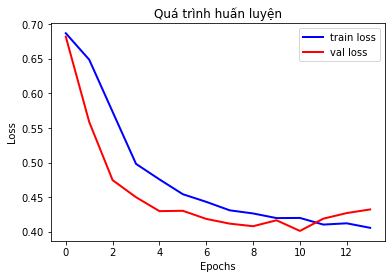

In [97]:
#generate plots
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], lw=2.0, color='b', label='train loss')
plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val loss')
plt.title('Quá trình huấn luyện')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

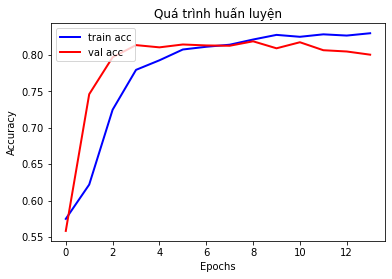

In [98]:
plt.figure()
plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train acc')
plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val acc')
plt.title('Quá trình huấn luyện')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Testing 

In [99]:
predictions = model.predict_classes(word_seq_test)

In [101]:
predictions.shape

(3263, 1)

In [109]:
k = 0
for k in range(15):
    text = tokenizer.sequences_to_texts(list(word_seq_test[k:k+1]))
    print(text)
    if predictions[k] > 0.5:
        print("văn bản trên mang nghĩa thảm họa", predictions[k])
    else:
        print("văn bản trên không mang nghĩa thảm họa", predictions[k])

['just happened a terrible car crash']
văn bản trên mang nghĩa thảm họa [1]
['heard about earthquake is different cities stay safe everyone']
văn bản trên mang nghĩa thảm họa [1]
['there is a forest fire at spot pond geese are fleeing across the street i can not save them all']
văn bản trên mang nghĩa thảm họa [1]
['apocalypse lighting spokane wildfires']
văn bản trên mang nghĩa thảm họa [1]
['typhoon soudelor kills 28 in china and taiwan']
văn bản trên mang nghĩa thảm họa [1]
["we 're shaking it 's an earthquake"]
văn bản trên mang nghĩa thảm họa [1]
["they 'd probably still show more life than arsenal did yesterday eh eh"]
văn bản trên không mang nghĩa thảm họa [0]
['hey how are you']
văn bản trên không mang nghĩa thảm họa [0]
['what a nice hat']
văn bản trên không mang nghĩa thảm họa [0]
['fuck off']
văn bản trên không mang nghĩa thảm họa [0]
["no i do n't like cold"]
văn bản trên không mang nghĩa thảm họa [0]
["nooooooooo do n't do that"]
văn bản trên không mang nghĩa thảm họa [0]
